<div class="alert alert-block alert-warning">
<h3>
    Final Project 
    <br>
    <br></h3>
<h1><center>Pengelompokan Startup berdasarkan faktor berapa kali didanai, besaran dana, kategori pendanaan, dan lokasi kantor</h1>
    <br></center>
    <h2>Muhamad Ariyanda Putra<br></h2>
    <h3>Purwadhika Data Science Bekasi</h3>

<div class="alert alert-block alert-success">
</div>

### Data : Startup Investments
### topics : Venture deals, organizations, people and exits
### by : Justinas Cirtautas

<div class="alert alert-block alert-success">
</div>

<div class="alert alert-block alert-info">
    <h1> 3rd Step: Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
STARTUP_DF = pd.read_pickle('STARTUP_DF_FINAL.pkl')

In [58]:
sns.set(style='darkgrid')

In [15]:
STARTUP_DF_PREPARED = STARTUP_DF[['FUND_COUNT','MIN_FUND_USD', 'MAX_FUND_USD',
       'RAISED_USD_SUM', 'RAISED_USD_MEAN', 'SERIES A', 'SERIES B',
       'SERIES C+', 'ANGEL', 'VENTURE', 'POST IPO', 'OTHER', 'COUNTRY_CODE_NO']]

In [5]:
STARTUP_DF_PREPARED

,FUND_COUNT,MIN_FUND_USD,MAX_FUND_USD,RAISED_USD_SUM,RAISED_USD_MEAN,SERIES A,SERIES B,SERIES C+,ANGEL,VENTURE,POST IPO,OTHER,COUNTRY_CODE_NO
0,1,5000000.0,5000000.0,5000000.0,5000000.0,1,0,0,0,0,0,0,0
1,1,5000000.0,5000000.0,5000000.0,5000000.0,1,0,0,0,0,0,0,0
2,1,2000000.0,2000000.0,2000000.0,2000000.0,1,0,0,0,0,0,0,0
3,1,2000000.0,2000000.0,2000000.0,2000000.0,1,0,0,0,0,0,0,1
4,1,1356210.0,1356210.0,1356210.0,1356210.0,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25075,1,4350000.0,4350000.0,4350000.0,4350000.0,1,0,0,0,0,0,0,0
25076,1,17000000.0,17000000.0,17000000.0,17000000.0,0,1,0,0,0,0,0,0
25077,1,151525.0,151525.0,151525.0,151525.0,0,0,0,0,1,0,0,6
25078,1,1969827.0,1969827.0,1969827.0,1969827.0,1,0,0,0,0,0,0,6


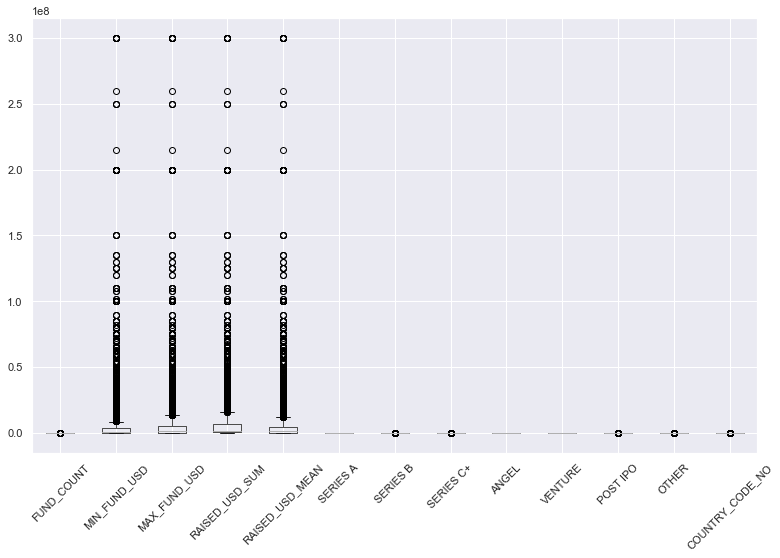

In [6]:
plt.figure(figsize=(13,8))
STARTUP_DF_PREPARED.boxplot()
plt.xticks(rotation = 45)
plt.show()

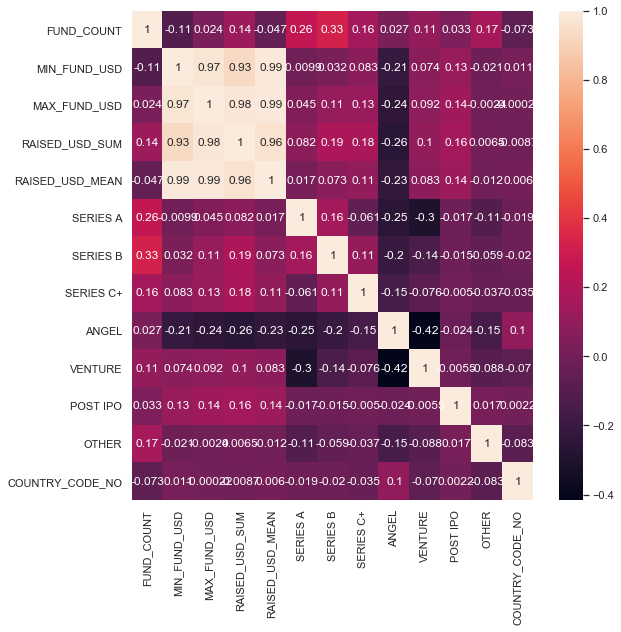

In [7]:
plt.figure(figsize=(9,9))
sns.heatmap(STARTUP_DF_PREPARED.corr(), annot=True)

In [16]:
STARTUP_DF_PREPARED_1 = STARTUP_DF_PREPARED.drop(['MIN_FUND_USD','MAX_FUND_USD','RAISED_USD_SUM'], axis = 1)

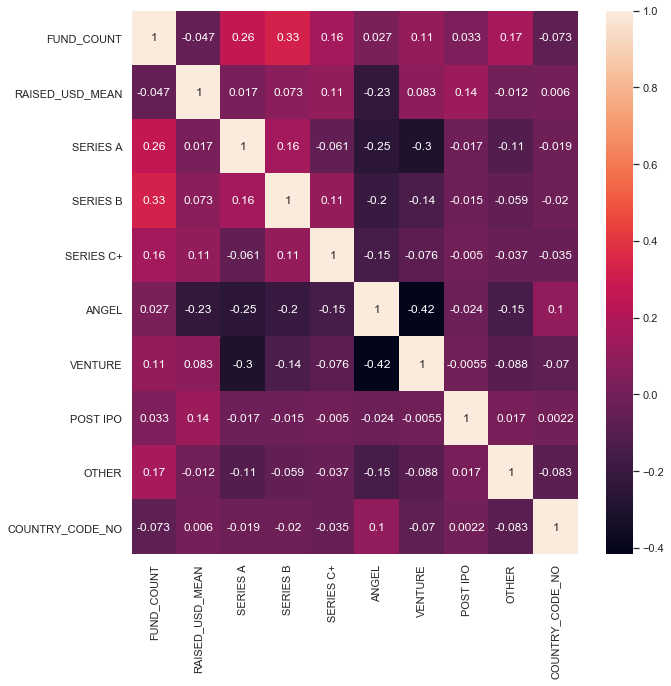

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(STARTUP_DF_PREPARED_1.corr(),annot=True)

# Why use standardize before clustering

K-means clustering is "isotropic" in all directions of space and therefore tends to produce more or less round (rather than elongated) clusters. In this situation leaving variances unequal is equivalent to putting more weight on variables with smaller variance.

## Only Numerical Data Need Scaling

In [17]:
STARTUP_DF_PREPARED_1_SCALE = STARTUP_DF_PREPARED_1[['FUND_COUNT','RAISED_USD_MEAN','COUNTRY_CODE_NO']]

In [93]:
# Data Standardization
# standard scaler
# drop target or Y

from sklearn.preprocessing import StandardScaler

DF_USED = STARTUP_DF_PREPARED_1_SCALE

scaler = StandardScaler()
scaler.fit(DF_USED)

STARTUP_DF_PREPARED_1_STANDARD = scaler.transform(DF_USED)

STARTUP_DF_PREPARED_1_STANDARD = pd.DataFrame(STARTUP_DF_PREPARED_1_STANDARD,columns=DF_USED.columns)

STARTUP_DF_PREPARED_1_STANDARD_JOINED = STARTUP_DF_PREPARED_1_STANDARD.join(STARTUP_DF_PREPARED_1.drop(['FUND_COUNT','RAISED_USD_MEAN','COUNTRY_CODE_NO'],axis=1))

STARTUP_DF_PREPARED_1_STANDARD_JOINED

,FUND_COUNT,RAISED_USD_MEAN,COUNTRY_CODE_NO,SERIES A,SERIES B,SERIES C+,ANGEL,VENTURE,POST IPO,OTHER
0,-0.606176,0.042723,-0.488427,1,0,0,0,0,0,0
1,-0.606176,0.042723,-0.488427,1,0,0,0,0,0,0
2,-0.606176,-0.212853,-0.488427,1,0,0,0,0,0,0
3,-0.606176,-0.212853,-0.410161,1,0,0,0,0,0,0
4,-0.606176,-0.267698,-0.331896,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
25075,-0.606176,-0.012652,-0.488427,1,0,0,0,0,0,0
25076,-0.606176,1.065023,-0.488427,0,1,0,0,0,0,0
25077,-0.606176,-0.370327,-0.018833,0,0,0,0,1,0,0
25078,-0.606176,-0.215423,-0.018833,1,0,0,0,0,0,0


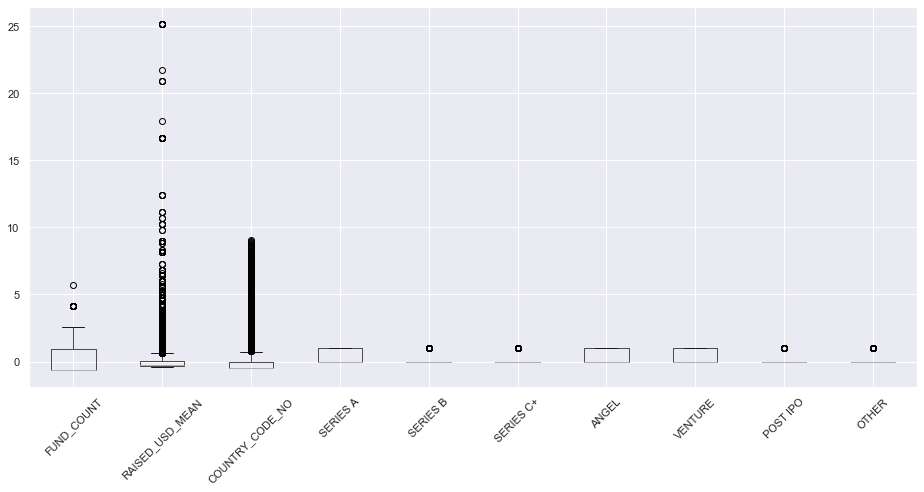

In [94]:
plt.figure(figsize=(13,7))
STARTUP_DF_PREPARED_1_STANDARD_JOINED.boxplot()
plt.xticks(rotation = 45)
plt.tight_layout()

In [18]:
# Data Normalization
# minmax
# drop target or Y

from sklearn.preprocessing import MinMaxScaler

DF_USED = STARTUP_DF_PREPARED_1_SCALE

scaler = MinMaxScaler()
scaler.fit(DF_USED)

STARTUP_DF_PREPARED_1_MINMAX = scaler.transform(DF_USED)

STARTUP_DF_PREPARED_1_MINMAX = pd.DataFrame(STARTUP_DF_PREPARED_1_MINMAX,columns=DF_USED.columns)

STARTUP_DF_PREPARED_1_MINMAX_JOINED = STARTUP_DF_PREPARED_1_MINMAX.join(STARTUP_DF_PREPARED_1.drop(['FUND_COUNT','RAISED_USD_MEAN','COUNTRY_CODE_NO'],axis=1))

STARTUP_DF_PREPARED_1_MINMAX_JOINED

,FUND_COUNT,RAISED_USD_MEAN,COUNTRY_CODE_NO,SERIES A,SERIES B,SERIES C+,ANGEL,VENTURE,POST IPO,OTHER
0,0.0,0.016663,0.000000,1,0,0,0,0,0,0
1,0.0,0.016663,0.000000,1,0,0,0,0,0,0
2,0.0,0.006663,0.000000,1,0,0,0,0,0,0
3,0.0,0.006663,0.008197,1,0,0,0,0,0,0
4,0.0,0.004517,0.016393,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
25075,0.0,0.014497,0.000000,1,0,0,0,0,0,0
25076,0.0,0.056664,0.000000,0,1,0,0,0,0,0
25077,0.0,0.000502,0.049180,0,0,0,0,1,0,0
25078,0.0,0.006563,0.049180,1,0,0,0,0,0,0


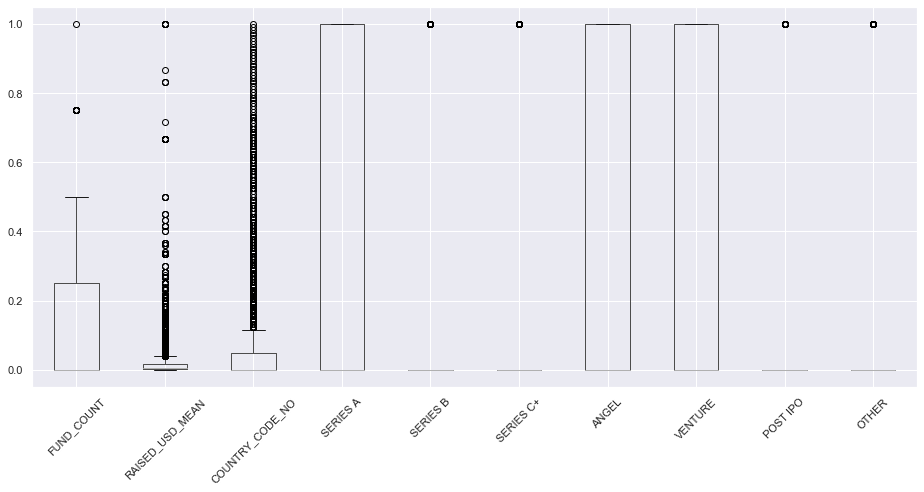

In [96]:
plt.figure(figsize=(13,7))
STARTUP_DF_PREPARED_1_MINMAX_JOINED.boxplot()
plt.xticks(rotation = 45)
plt.tight_layout()

In [97]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, random_state=101)
pca.fit(STARTUP_DF_PREPARED_1_STANDARD_JOINED)
STARTUP_DF_PREPARED_1_STANDARD_JOINED_PCA = pca.transform(STARTUP_DF_PREPARED_1_STANDARD_JOINED)

STARTUP_DF_PREPARED_1_STANDARD_JOINED_PCA = pd.DataFrame(STARTUP_DF_PREPARED_1_STANDARD_JOINED_PCA,columns=['PC1','PC2'])

STARTUP_DF_PREPARED_1_STANDARD_JOINED_PCA

,PC1,PC2
0,0.152907,0.263984
1,0.152907,0.263984
2,0.070112,0.039701
3,0.114054,0.005072
4,0.232427,-0.255059
...,...,...
25075,0.134968,0.215389
25076,0.507365,1.171635
25077,0.339359,-0.249614
25078,0.332928,-0.170327


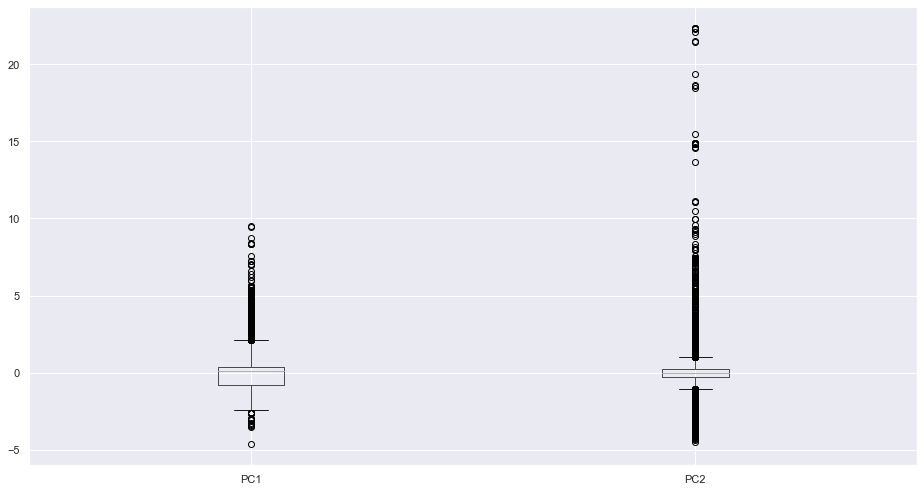

In [98]:
plt.figure(figsize=(13,7))
STARTUP_DF_PREPARED_1_STANDARD_JOINED_PCA.boxplot()
plt.tight_layout()

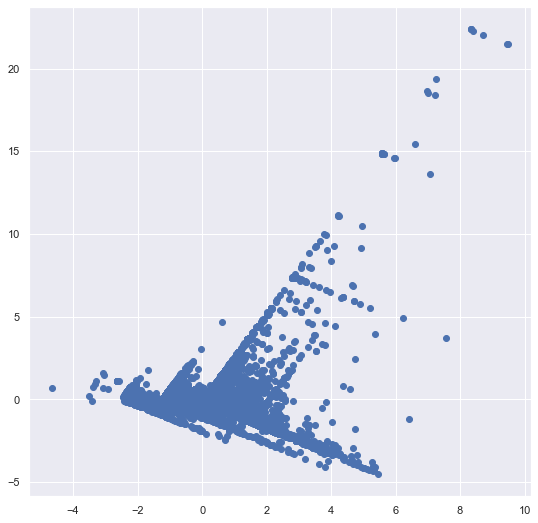

In [99]:
plt.figure (figsize = (9,9))
plt.scatter(STARTUP_DF_PREPARED_1_STANDARD_JOINED_PCA['PC1'], STARTUP_DF_PREPARED_1_STANDARD_JOINED_PCA['PC2'])
plt.show()

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, random_state=101)
pca.fit(STARTUP_DF_PREPARED_1_MINMAX_JOINED)
STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA = pca.transform(STARTUP_DF_PREPARED_1_MINMAX_JOINED)

STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA = pd.DataFrame(STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA,columns=['PC1','PC2'])

STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA

,PC1,PC2
0,0.131778,0.787758
1,0.131778,0.787758
2,0.131900,0.787684
3,0.132059,0.787610
4,0.671411,-0.476384
...,...,...
25075,0.131805,0.787742
25076,0.005738,0.233073
25077,-0.728414,-0.301517
25078,0.132850,0.787235


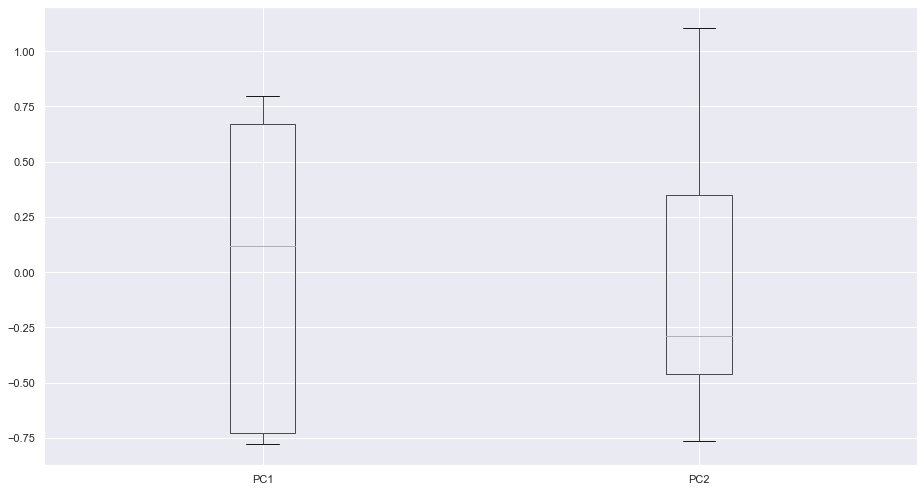

In [101]:
plt.figure(figsize=(13,7))
STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA.boxplot()
plt.tight_layout()

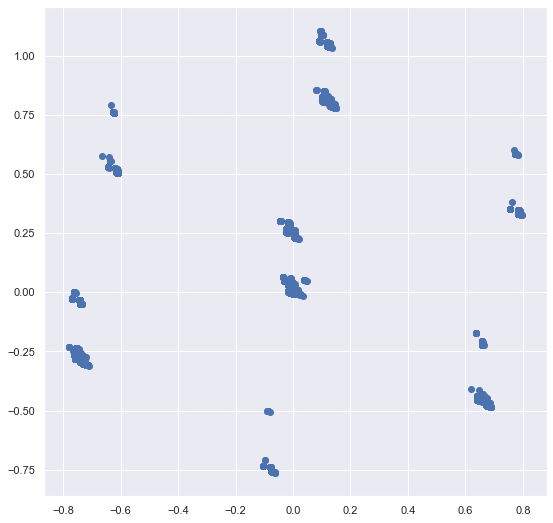

In [102]:
plt.figure (figsize = (9,9))
plt.scatter(STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA['PC1'], STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA['PC2'])
plt.show()

<div class="alert alert-block alert-info">
    <h1> 4th Step: Cluster modeling

<div class="alert alert-block alert-warning">
    <h2> K-Means

# 1.Standardized Data

Text(0, 0.5, 'Inertia')

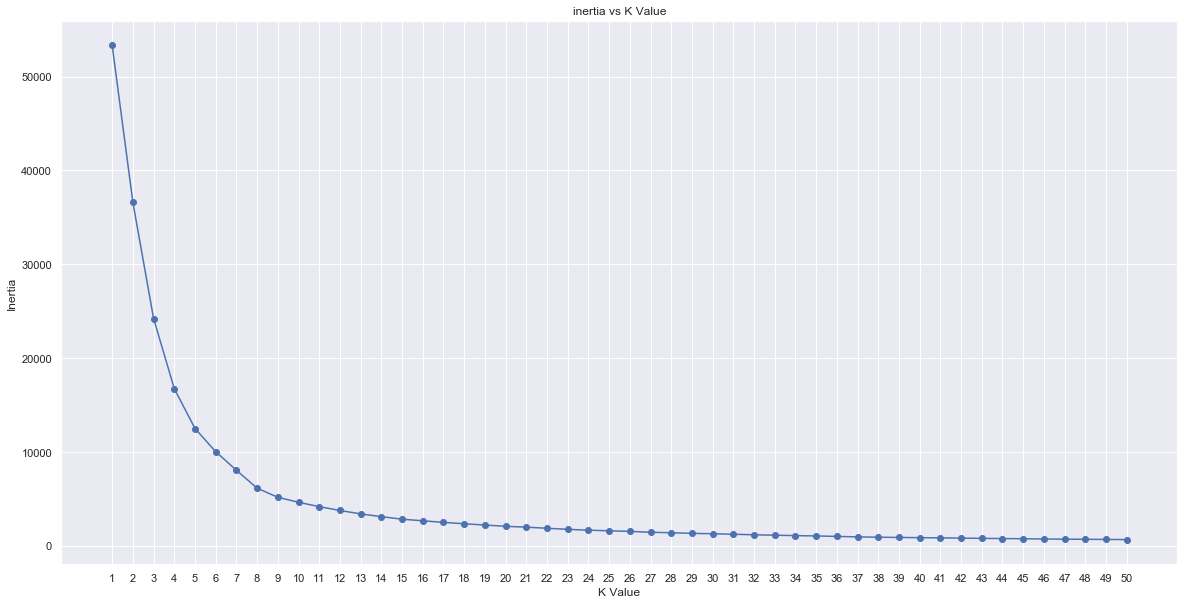

In [103]:
from sklearn.cluster import KMeans

DF_USED = STARTUP_DF_PREPARED_1_STANDARD_JOINED_PCA
COLUMN_USED = STARTUP_DF_PREPARED_1_STANDARD_JOINED_PCA.columns
PENGACAK = 101
DARI = 1
HINGGA = 51

inertia_list = []

for i in range(DARI,HINGGA):
    kmeans = KMeans(n_clusters = i , random_state = PENGACAK)
    kmeans.fit(DF_USED[COLUMN_USED])
    inertia_list.append(kmeans.inertia_)
    
plt.figure(figsize=(20,10))
plt.plot(range(DARI,HINGGA),inertia_list, marker = 'o')
plt.title('inertia vs K Value')
plt.xticks(range(DARI,HINGGA))
plt.xlabel('K Value')
plt.ylabel('Inertia')

In [109]:
KCHECK = [5,6,7,8,9,10,11,12]
DFUSED = STARTUP_DF_PREPARED_1_STANDARD_JOINED_PCA
PENGACAK = 101
STD_LIST = []

for i in KCHECK:
    nklustertemp = i 
    
    kmeanstemp = KMeans (n_clusters = nklustertemp , random_state = PENGACAK)
    kmeanstemp.fit(DF_USED)
    df_kmeans_temp = pd.DataFrame(DFUSED, columns = DFUSED.columns)
    df_kmeans_temp['Cluster'] = kmeanstemp.labels_
    
    by_clustertemp = df_kmeans_temp.groupby('Cluster')
    stdtemp = np.mean(by_clustertemp.std()).mean()
    
    STD_LIST.append(stdtemp)

STD_KMEANS = STD_LIST

In [110]:
STD_LIST = STD_KMEANS

IMPROVE_LIST = []

for i in range(len(KCHECK)):
    if i < (len(KCHECK)-1):
        improvetemp = STD_LIST[i] - STD_LIST[i+1]
        IMPROVE_LIST.append(improvetemp)
    if i == 0:
        print('N_CLUSTER : '+str(KCHECK[i])+' STD MEAN : ' +str(np.round(STD_LIST[i],3)))
    else:
        print('N_CLUSTER : '+str(KCHECK[i])+' STD MEAN : ' +str(np.round(STD_LIST[i],3)) + ' IMPROVEMENT : '+ str(np.round(IMPROVE_LIST[i-1],4)))
        
IMPROVE_KMEANS = IMPROVE_LIST 

N_CLUSTER : 5 STD MEAN : 1.067
N_CLUSTER : 6 STD MEAN : 0.935 IMPROVEMENT : 0.1322
N_CLUSTER : 7 STD MEAN : 0.822 IMPROVEMENT : 0.1127
N_CLUSTER : 8 STD MEAN : 0.774 IMPROVEMENT : 0.0481
N_CLUSTER : 9 STD MEAN : 0.736 IMPROVEMENT : 0.0379
N_CLUSTER : 10 STD MEAN : 0.675 IMPROVEMENT : 0.0615
N_CLUSTER : 11 STD MEAN : 0.634 IMPROVEMENT : 0.0405
N_CLUSTER : 12 STD MEAN : 0.592 IMPROVEMENT : 0.0427


In [111]:
KLUSTERN = 10
DFMENTAH = STARTUP_DF
DF_USED = STARTUP_DF_PREPARED_1_STANDARD_JOINED_PCA
PENGACAK = 101

kmeans10 = KMeans (n_clusters = KLUSTERN , random_state = PENGACAK)
kmeans10.fit(DF_USED)
df_kmeans10 = pd.DataFrame (DFMENTAH, columns = DFMENTAH.columns)
df_kmeans10['Cluster'] = kmeans10.labels_

print('Cluster Value Counts')
print(df_kmeans10['Cluster'].value_counts())
print('Cluster Percentage')
print(df_kmeans10['Cluster'].value_counts(1)*100)

Cluster Value Counts
0    7182
1    7077
3    3182
5    2885
4    1784
8    1650
2     779
6     435
9      81
7      25
Name: Cluster, dtype: int64
Cluster Percentage
0    28.636364
1    28.217703
3    12.687400
5    11.503190
4     7.113238
8     6.578947
2     3.106061
6     1.734450
9     0.322967
7     0.099681
Name: Cluster, dtype: float64


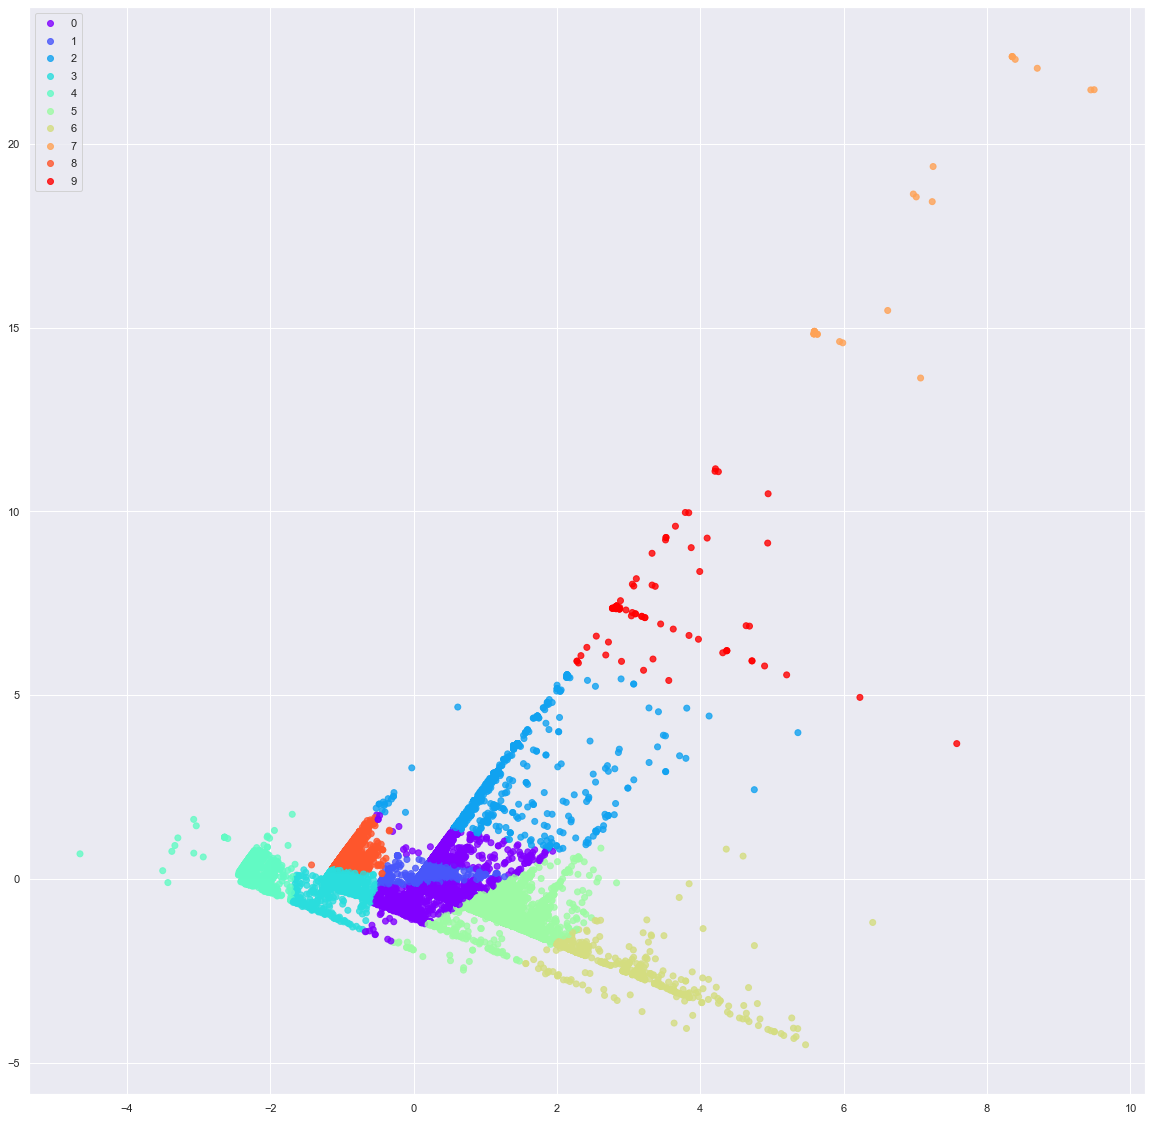

In [115]:
plt.figure (figsize = (20,20))
scatter = plt.scatter(STARTUP_DF_PREPARED_1_STANDARD_JOINED_PCA['PC1'], STARTUP_DF_PREPARED_1_STANDARD_JOINED_PCA['PC2'],  c = df_kmeans10['Cluster'], cmap='rainbow', alpha=0.8)
plt.legend(*scatter.legend_elements())
plt.show()

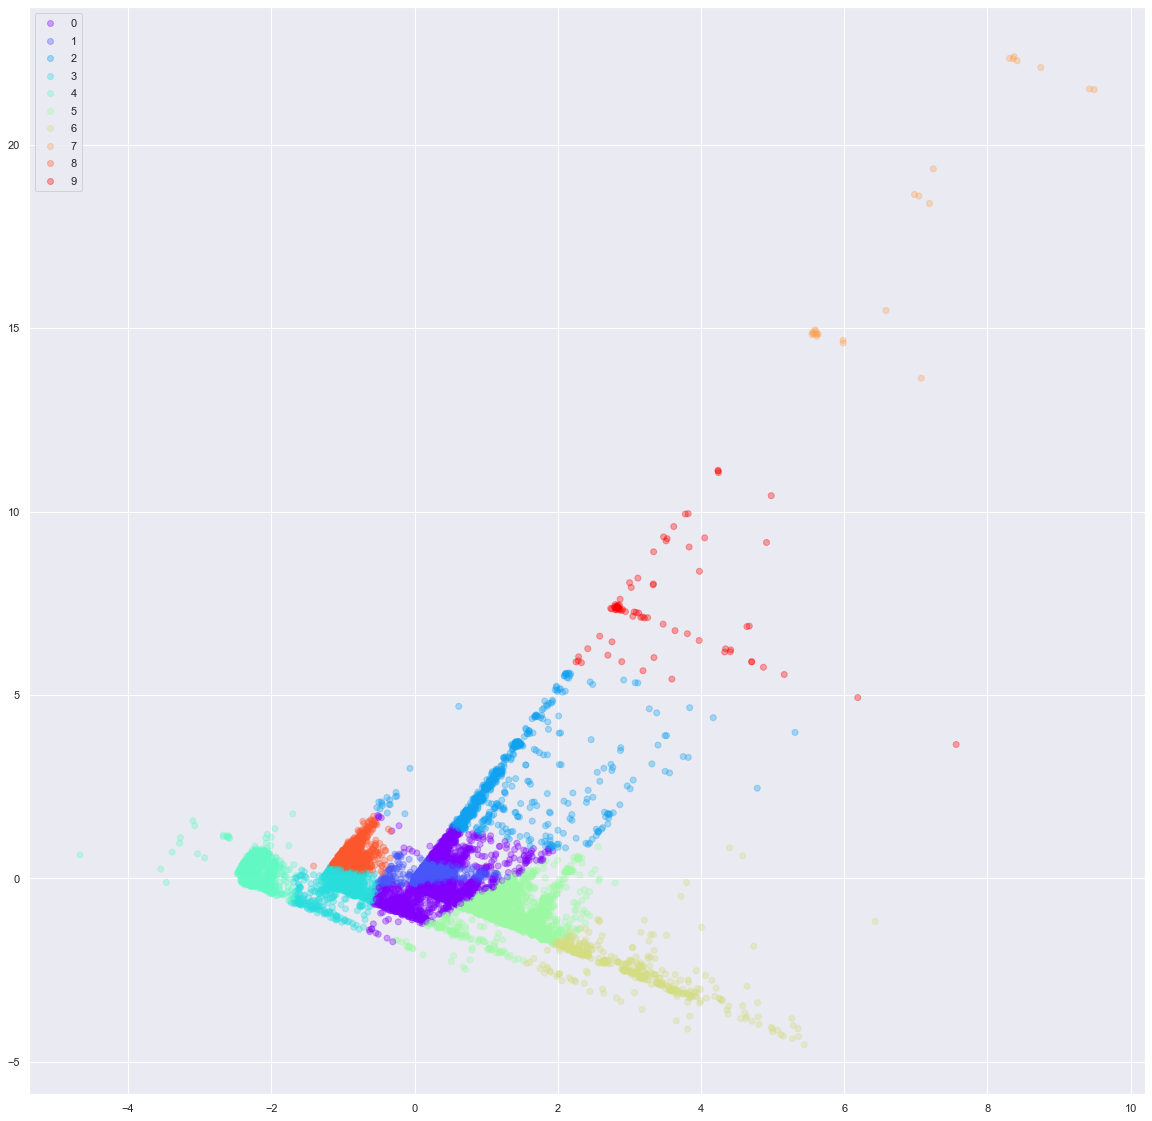

In [116]:
y = STARTUP_DF_PREPARED_1_STANDARD_JOINED_PCA['PC1']
x = STARTUP_DF_PREPARED_1_STANDARD_JOINED_PCA['PC2']
jittered_y = y + 0.1 * np.random.rand(len(y)) -0.05
jittered_x = x + 0.1 * np.random.rand(len(x)) -0.05

plt.figure (figsize = (20,20))
scatter = plt.scatter(jittered_y, jittered_x,  c = df_kmeans10['Cluster'], cmap='rainbow', alpha=1/3)
plt.legend(*scatter.legend_elements())
plt.show()

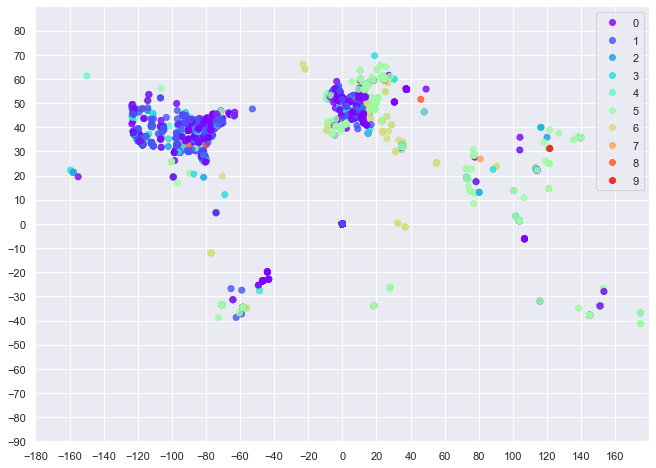

In [117]:
plt.figure(figsize=(11,8))
scatter = plt.scatter(y='LATITUDE',x='LONGITUDE',data=df_kmeans10, c = 'Cluster', cmap='rainbow', alpha=0.8)
plt.ylim(-90,90)
plt.yticks(np.arange(-90,90,10))
plt.xlim(-180,180)
plt.xticks(np.arange(-180,180,20))
plt.legend(*scatter.legend_elements())
plt.show()

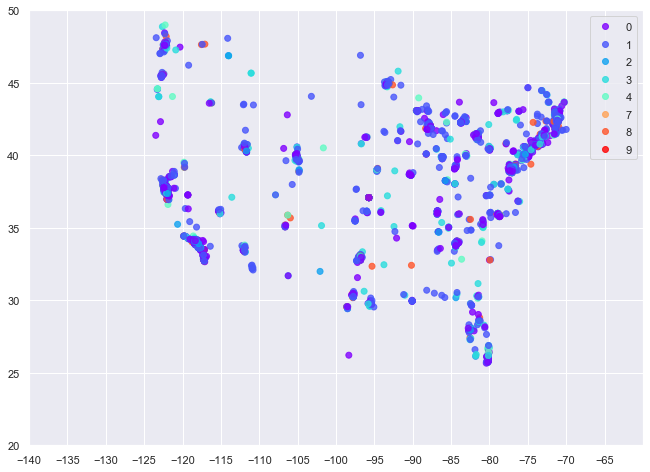

In [118]:
plt.figure(figsize=(11,8))
scatter = plt.scatter(y='LATITUDE',x='LONGITUDE',data=df_kmeans10[df_kmeans10['COUNTRY_CODE']=='USA'], c = 'Cluster', cmap='rainbow', alpha=0.8)
plt.ylim(20,50)
plt.yticks(np.arange(20,55,5))
plt.xlim(-140,-60)
plt.xticks(np.arange(-140,-60,5))
plt.legend(*scatter.legend_elements())
plt.show()

# 2.Normalized Data

Text(0, 0.5, 'Inertia')

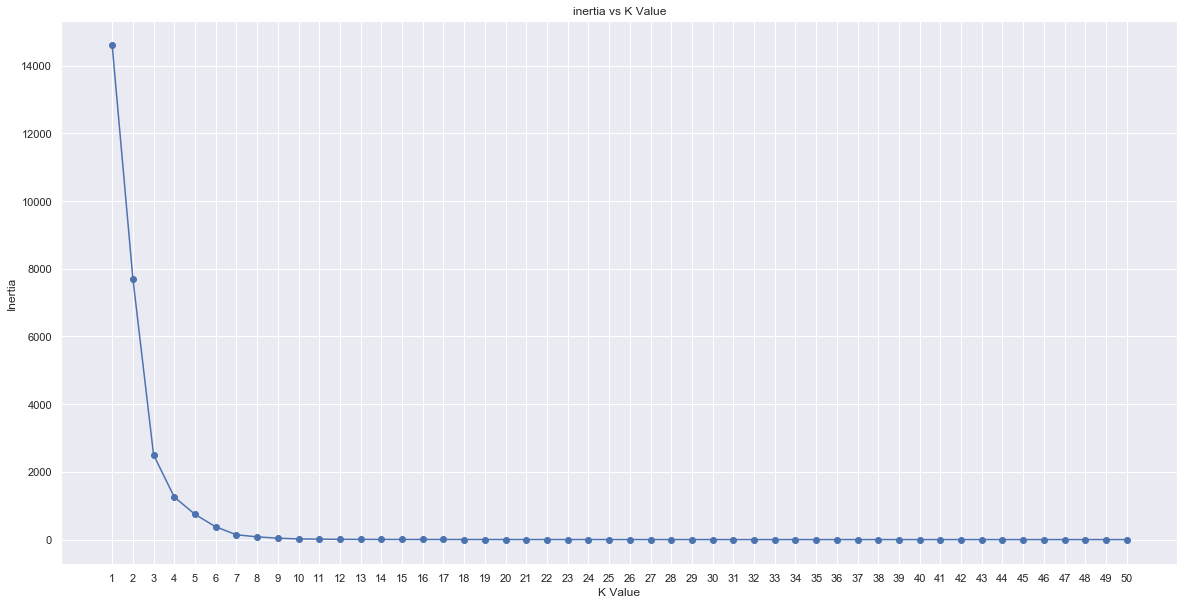

In [166]:
from sklearn.cluster import KMeans

DF_USED = STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA
COLUMN_USED = STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA.columns
PENGACAK = 101
DARI = 1
HINGGA = 51

inertia_list = []

for i in range(DARI,HINGGA):
    kmeans = KMeans(n_clusters = i , random_state = PENGACAK)
    kmeans.fit(DF_USED[COLUMN_USED])
    inertia_list.append(kmeans.inertia_)
    
plt.figure(figsize=(20,10))
plt.plot(range(DARI,HINGGA),inertia_list, marker = 'o')
plt.title('inertia vs K Value')
plt.xticks(range(DARI,HINGGA))
plt.xlabel('K Value')
plt.ylabel('Inertia')

In [167]:
KCHECK = [2,3,4,5,6,7,8]
DFUSED = STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA
PENGACAK = 101
STD_LIST = []

for i in KCHECK:
    nklustertemp = i 
    
    kmeanstemp = KMeans (n_clusters = nklustertemp , random_state = PENGACAK)
    kmeanstemp.fit(DF_USED)
    df_kmeans_temp = pd.DataFrame(DFUSED, columns = DFUSED.columns)
    df_kmeans_temp['Cluster'] = kmeanstemp.labels_
    
    by_clustertemp = df_kmeans_temp.groupby('Cluster')
    stdtemp = np.mean(by_clustertemp.std()).mean()
    
    STD_LIST.append(stdtemp)

STD_KMEANS = STD_LIST

In [168]:
STD_LIST = STD_KMEANS

IMPROVE_LIST = []

for i in range(len(KCHECK)):
    if i < (len(KCHECK)-1):
        improvetemp = STD_LIST[i] - STD_LIST[i+1]
        IMPROVE_LIST.append(improvetemp)
    if i == 0:
        print('N_CLUSTER : '+str(KCHECK[i])+' STD MEAN : ' +str(np.round(STD_LIST[i],3)))
    else:
        print('N_CLUSTER : '+str(KCHECK[i])+' STD MEAN : ' +str(np.round(STD_LIST[i],3)) + ' IMPROVEMENT : '+ str(np.round(IMPROVE_LIST[i-1],4)))
        
IMPROVE_KMEANS = IMPROVE_LIST 

N_CLUSTER : 2 STD MEAN : 0.321
N_CLUSTER : 3 STD MEAN : 0.17 IMPROVEMENT : 0.1507
N_CLUSTER : 4 STD MEAN : 0.123 IMPROVEMENT : 0.0478
N_CLUSTER : 5 STD MEAN : 0.093 IMPROVEMENT : 0.0297
N_CLUSTER : 6 STD MEAN : 0.059 IMPROVEMENT : 0.0338
N_CLUSTER : 7 STD MEAN : 0.04 IMPROVEMENT : 0.0193
N_CLUSTER : 8 STD MEAN : 0.03 IMPROVEMENT : 0.0097


In [30]:
KLUSTERN = 6
DFMENTAH = STARTUP_DF
DF_USED = STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA
PENGACAK = 101

kmeans6 = KMeans (n_clusters = KLUSTERN , random_state = PENGACAK)
kmeans6.fit(DF_USED)
df_kmeans6 = pd.DataFrame (DFMENTAH, columns = DFMENTAH.columns)
df_kmeans6['Cluster'] = kmeans6.labels_

print('Cluster Value Counts')
print(df_kmeans6['Cluster'].value_counts())
print('Cluster Percentage')
print(df_kmeans6['Cluster'].value_counts(1)*100)

Cluster Value Counts
2    7404
0    7105
3    5374
4    3550
5     893
1     754
Name: Cluster, dtype: int64
Cluster Percentage
2    29.521531
0    28.329346
3    21.427432
4    14.154705
5     3.560606
1     3.006380
Name: Cluster, dtype: float64


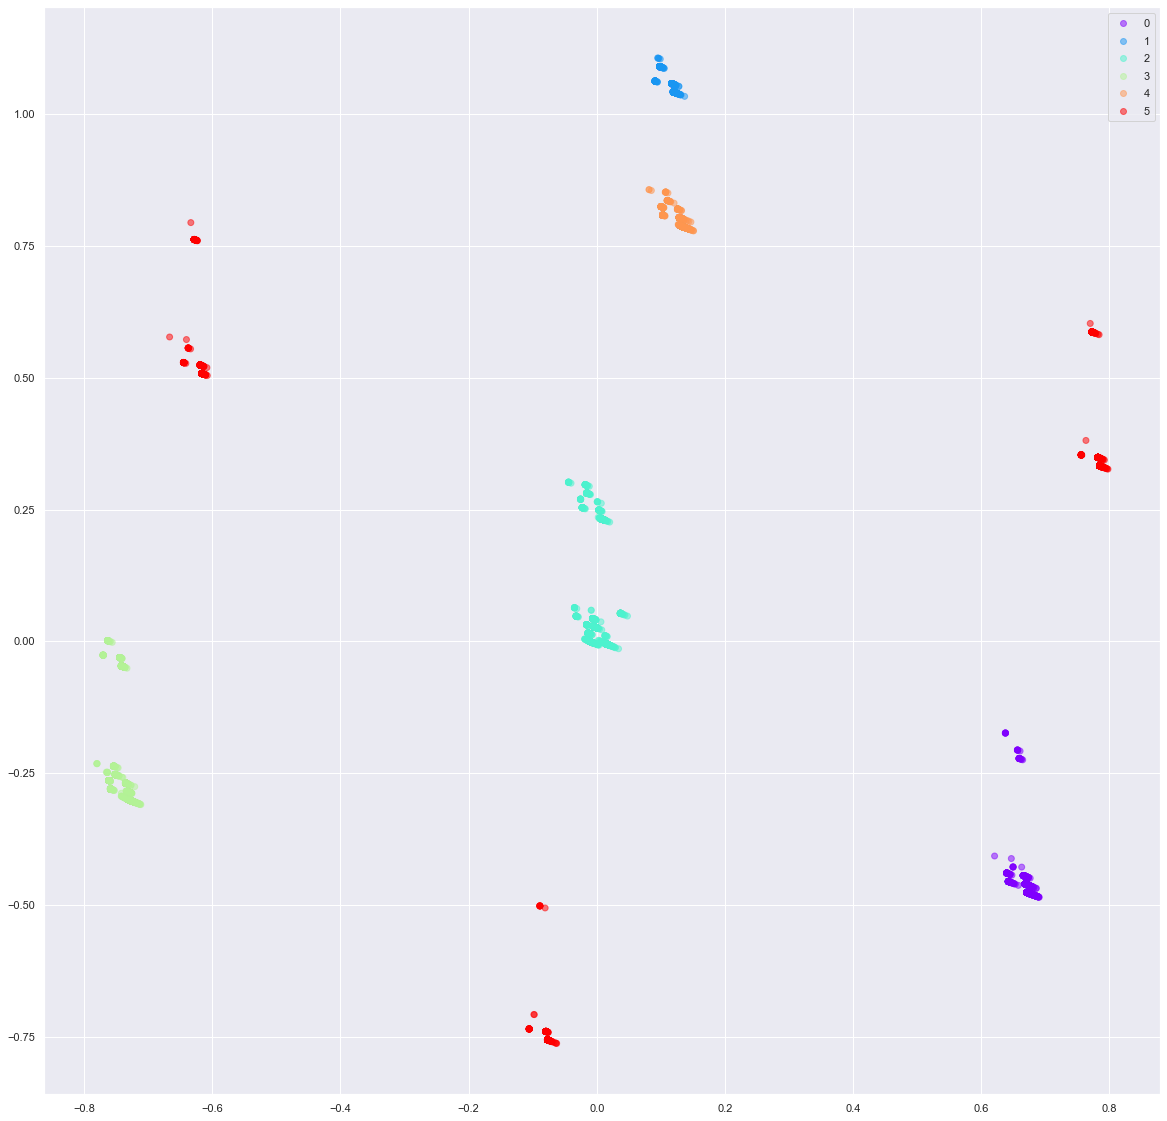

In [129]:
plt.figure (figsize = (20,20))
scatter = plt.scatter(STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA['PC1'], STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA['PC2'],  c = df_kmeans6['Cluster'], cmap='rainbow', alpha=0.5)
plt.legend(*scatter.legend_elements())
plt.show()

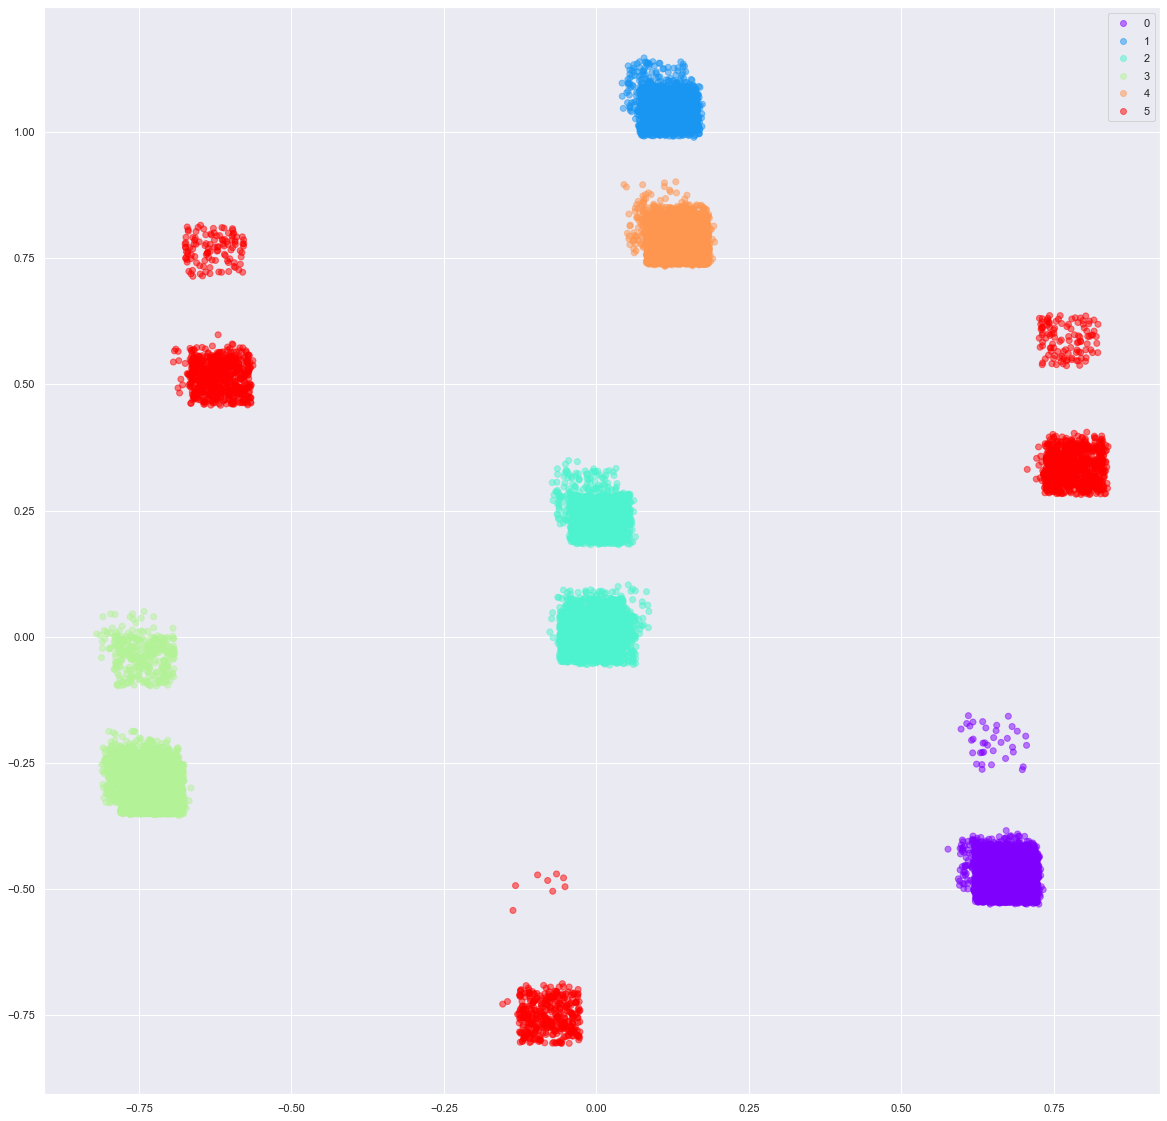

In [130]:
y = STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA['PC1']
x = STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA['PC2']
jittered_y = y + 0.1 * np.random.rand(len(y)) -0.05
jittered_x = x + 0.1 * np.random.rand(len(x)) -0.05

plt.figure (figsize = (20,20))
scatter = plt.scatter(jittered_y, jittered_x,  c = df_kmeans6['Cluster'], cmap='rainbow', alpha=0.5)
plt.legend(*scatter.legend_elements())
plt.show()

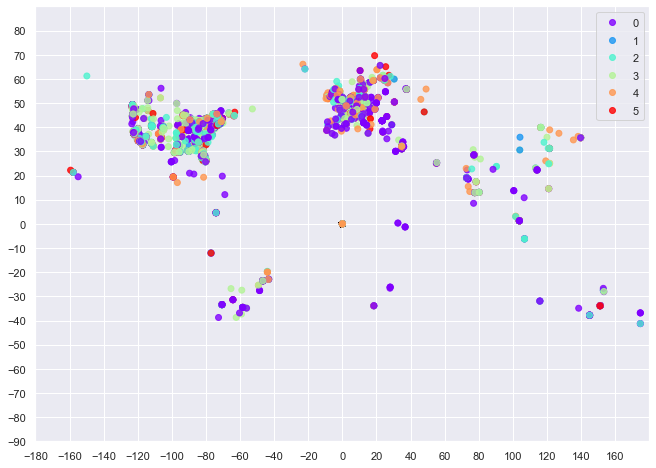

In [131]:
plt.figure(figsize=(11,8))
scatter = plt.scatter(y='LATITUDE',x='LONGITUDE',data=df_kmeans6, c = 'Cluster', cmap='rainbow', alpha=0.8)
plt.ylim(-90,90)
plt.yticks(np.arange(-90,90,10))
plt.xlim(-180,180)
plt.xticks(np.arange(-180,180,20))
plt.legend(*scatter.legend_elements())
plt.show()

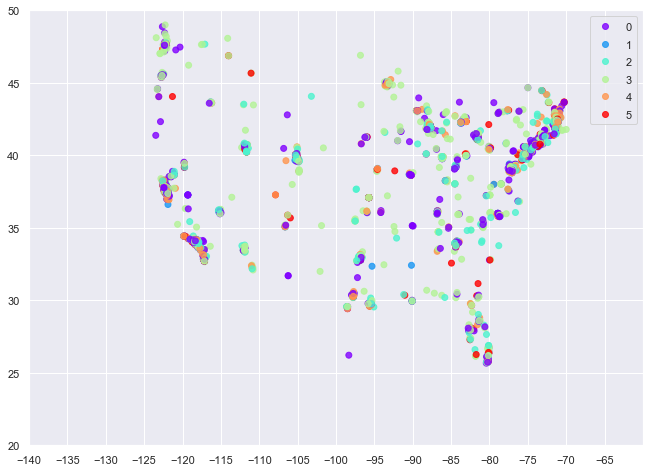

In [132]:
plt.figure(figsize=(11,8))
scatter = plt.scatter(y='LATITUDE',x='LONGITUDE',data=df_kmeans6[df_kmeans6['COUNTRY_CODE']=='USA'], c = 'Cluster', cmap='rainbow', alpha=0.8)
plt.ylim(20,50)
plt.yticks(np.arange(20,55,5))
plt.xlim(-140,-60)
plt.xticks(np.arange(-140,-60,5))
plt.legend(*scatter.legend_elements())
plt.show()

<div class="alert alert-block alert-warning">
    <h2> Silhouette Samples

# 1.Standardized Data

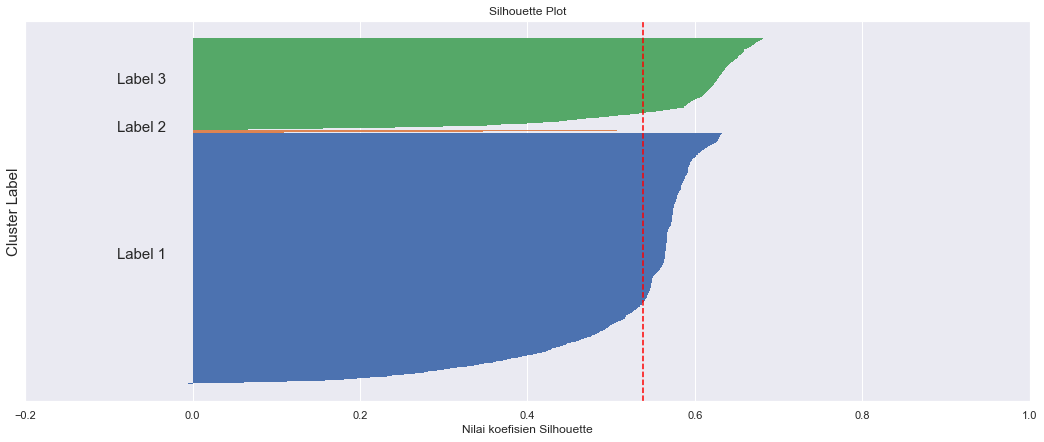

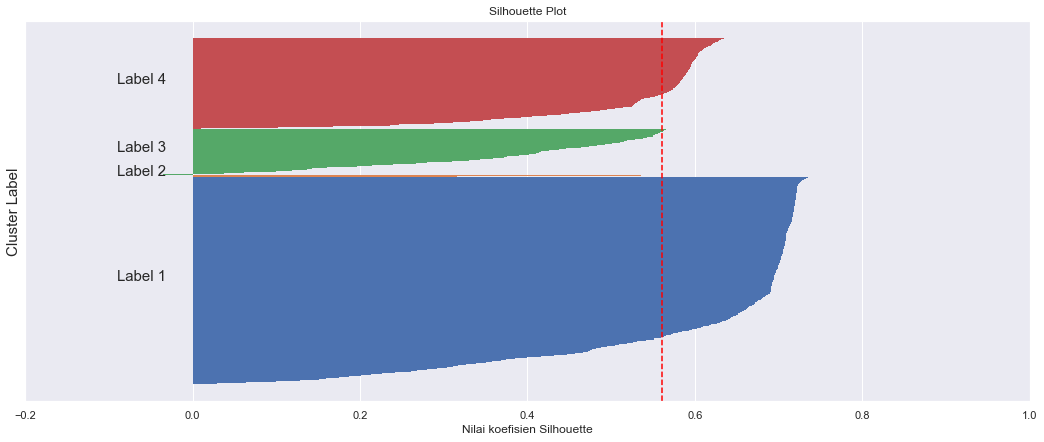

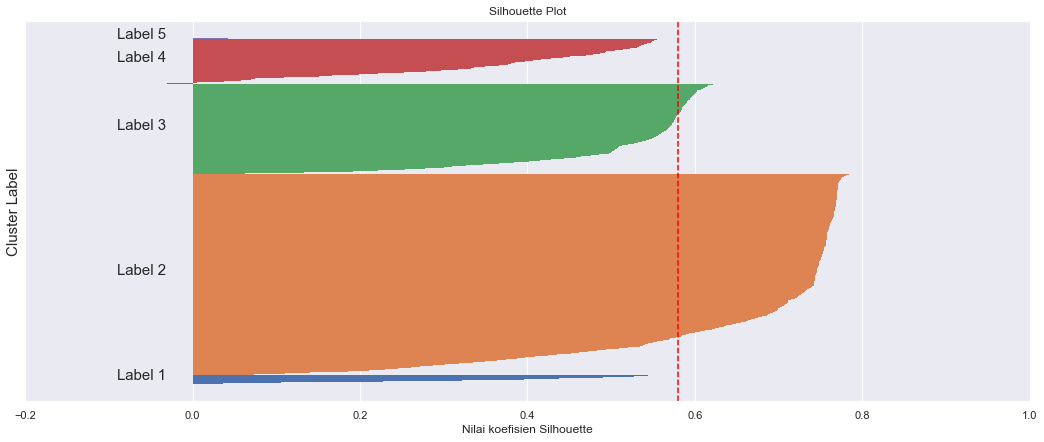

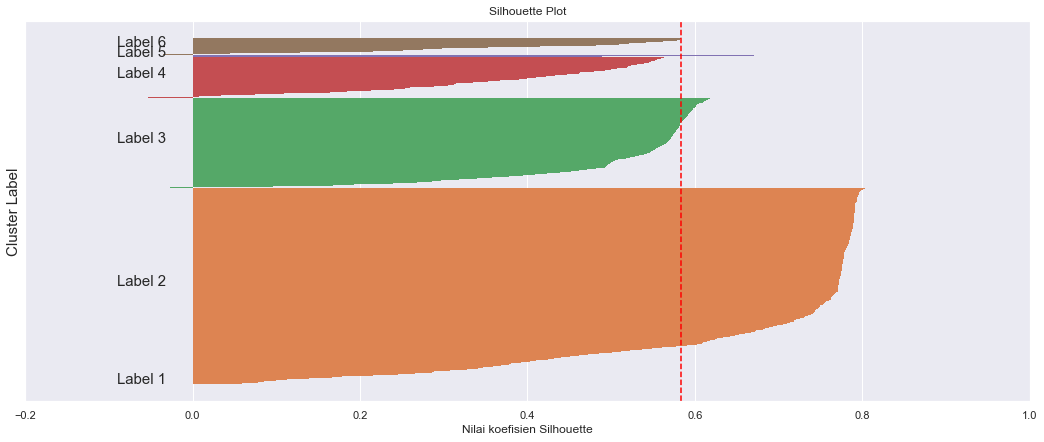

In [17]:
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans

DF_USED = STARTUP_DF_PREPARED_1_STANDARD_JOINED_PCA
COLUMNS_USED = STARTUP_DF_PREPARED_1_STANDARD_JOINED_PCA.columns
DARI = 3
HINGGA = 7

for i,k in enumerate(list(range(DARI,HINGGA))):
    fig, (ax1) = plt.subplots(1,1)
    fig.set_size_inches(18,7)
    
    #KMeans
    kmeans = KMeans(n_clusters = k)
    labels = kmeans.fit_predict(DF_USED[COLUMNS_USED])
    centroids = kmeans.cluster_centers_
    
    #Silhouette Samples
    s_vals = silhouette_samples(DF_USED[COLUMNS_USED],labels)
    
    #Plot 1 (Silhouette)
    y_ticks = []
    ylower, yupper = 0,0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_s_vals = s_vals[labels == cluster]
        cluster_s_vals.sort()
        yupper+=len(cluster_s_vals)
        ax1.barh(range(ylower, yupper),cluster_s_vals, edgecolor = 'none', height = 2)
        ax1.text(-0.09,(ylower+yupper)/2,'Label '+str(i+1), fontsize = 15)
        ylower+=len(cluster_s_vals)
    
    #Average Line
    avg_score = np.mean(s_vals)
    ax1.axvline(avg_score, linestyle='--', color = 'red')
    ax1.set_yticks([])
    ax1.set_xlim(-0.2,1)
    ax1.set_xlabel('Nilai koefisien Silhouette')
    ax1.set_ylabel('Cluster Label',fontsize=15)
    ax1.set_title('Silhouette Plot')

# 2.Normalized Data

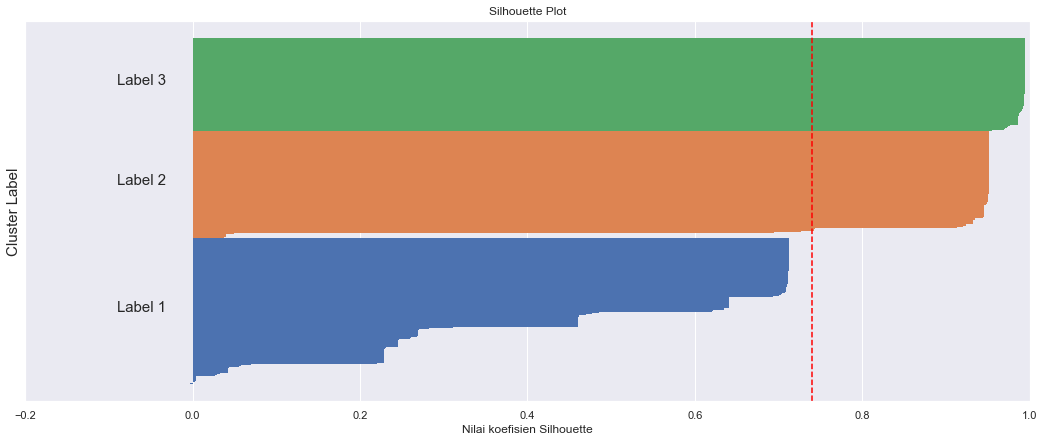

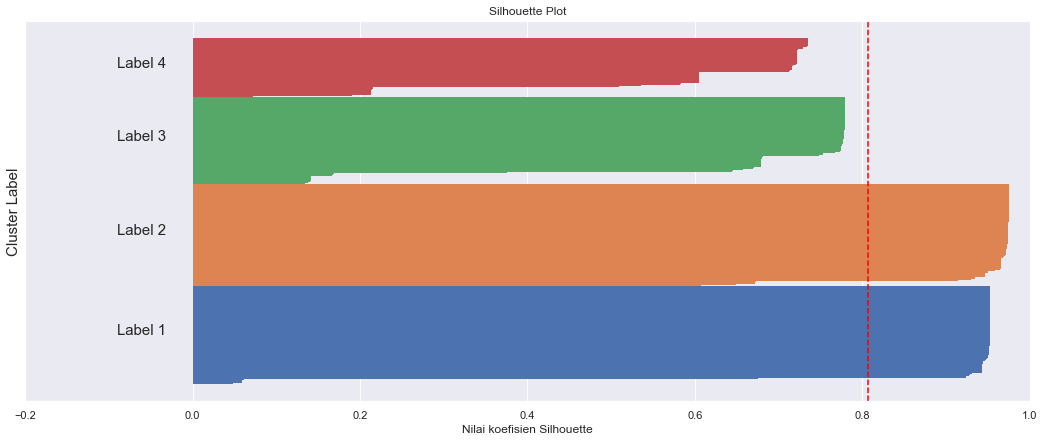

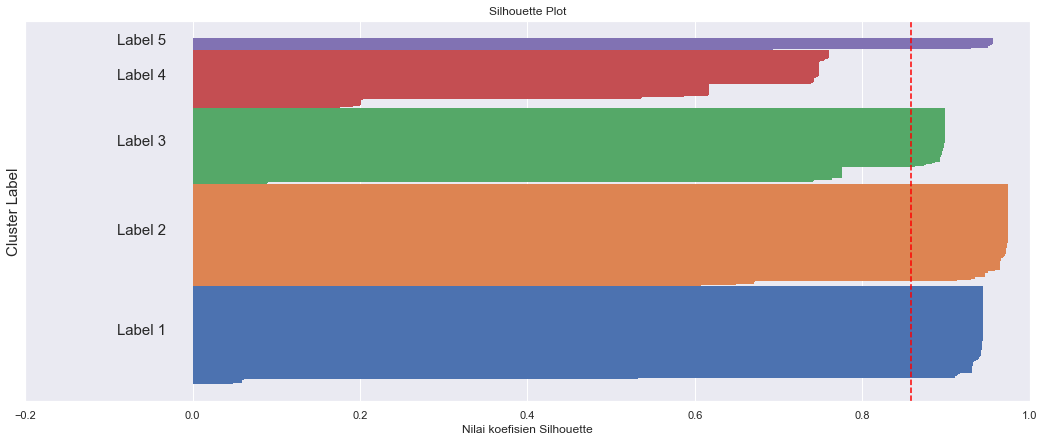

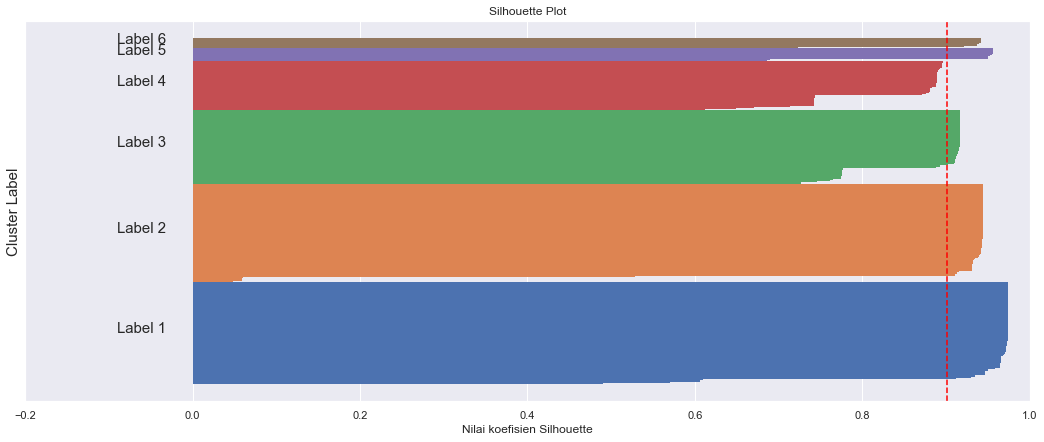

In [15]:
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans

DF_USED = STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA
COLUMNS_USED = STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA.columns
DARI = 3
HINGGA = 7

for i,k in enumerate(list(range(DARI,HINGGA))):
    fig, (ax1) = plt.subplots(1,1)
    fig.set_size_inches(18,7)
    
    #KMeans
    kmeans = KMeans(n_clusters = k)
    labels = kmeans.fit_predict(DF_USED[COLUMNS_USED])
    centroids = kmeans.cluster_centers_
    
    #Silhouette Samples
    s_vals = silhouette_samples(DF_USED[COLUMNS_USED],labels)
    
    #Plot 1 (Silhouette)
    y_ticks = []
    ylower, yupper = 0,0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_s_vals = s_vals[labels == cluster]
        cluster_s_vals.sort()
        yupper+=len(cluster_s_vals)
        ax1.barh(range(ylower, yupper),cluster_s_vals, edgecolor = 'none', height = 2)
        ax1.text(-0.09,(ylower+yupper)/2,'Label '+str(i+1), fontsize = 15)
        ylower+=len(cluster_s_vals)
    
    #Average Line
    avg_score = np.mean(s_vals)
    ax1.axvline(avg_score, linestyle='--', color = 'red')
    ax1.set_yticks([])
    ax1.set_xlim(-0.2,1)
    ax1.set_xlabel('Nilai koefisien Silhouette')
    ax1.set_ylabel('Cluster Label',fontsize=15)
    ax1.set_title('Silhouette Plot')

<div class="alert alert-block alert-info">
    <h1> 5th Step: Cluster description

## Data Used and Data Preparation
 - Data is normalized using MinMaxScaler to reduce range of each numerical columns
 - Data columns or variabel is reduced. Linear dimensionality reduction using Singular Value Decomposition into two variable so it can be presented in a scatter plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
STARTUP_DF = pd.read_pickle('STARTUP_DF_FINAL.pkl')

In [11]:
STARTUP_DF_PREPARED = STARTUP_DF[['FUND_COUNT','MIN_FUND_USD', 'MAX_FUND_USD',
       'RAISED_USD_SUM', 'RAISED_USD_MEAN', 'SERIES A', 'SERIES B',
       'SERIES C+', 'ANGEL', 'VENTURE', 'POST IPO', 'OTHER', 'COUNTRY_CODE_NO']]

In [12]:
STARTUP_DF_PREPARED_1 = STARTUP_DF_PREPARED.drop(['MIN_FUND_USD','MAX_FUND_USD','RAISED_USD_SUM'], axis = 1)

In [14]:
STARTUP_DF_PREPARED_1_SCALE = STARTUP_DF_PREPARED_1[['FUND_COUNT','RAISED_USD_MEAN','COUNTRY_CODE_NO']]

In [16]:
# Data Normalization
# minmax
# drop target or Y

from sklearn.preprocessing import MinMaxScaler

DF_USED = STARTUP_DF_PREPARED_1_SCALE

scaler = MinMaxScaler()
scaler.fit(DF_USED)

STARTUP_DF_PREPARED_1_MINMAX = scaler.transform(DF_USED)

STARTUP_DF_PREPARED_1_MINMAX = pd.DataFrame(STARTUP_DF_PREPARED_1_MINMAX,columns=DF_USED.columns)

STARTUP_DF_PREPARED_1_MINMAX_JOINED = STARTUP_DF_PREPARED_1_MINMAX.join(STARTUP_DF_PREPARED_1.drop(['FUND_COUNT','RAISED_USD_MEAN','COUNTRY_CODE_NO'],axis=1))

STARTUP_DF_PREPARED_1_MINMAX_JOINED

,FUND_COUNT,RAISED_USD_MEAN,COUNTRY_CODE_NO,SERIES A,SERIES B,SERIES C+,ANGEL,VENTURE,POST IPO,OTHER
0,0.0,0.016663,0.000000,1,0,0,0,0,0,0
1,0.0,0.016663,0.000000,1,0,0,0,0,0,0
2,0.0,0.006663,0.000000,1,0,0,0,0,0,0
3,0.0,0.006663,0.008197,1,0,0,0,0,0,0
4,0.0,0.004517,0.016393,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
25075,0.0,0.014497,0.000000,1,0,0,0,0,0,0
25076,0.0,0.056664,0.000000,0,1,0,0,0,0,0
25077,0.0,0.000502,0.049180,0,0,0,0,1,0,0
25078,0.0,0.006563,0.049180,1,0,0,0,0,0,0


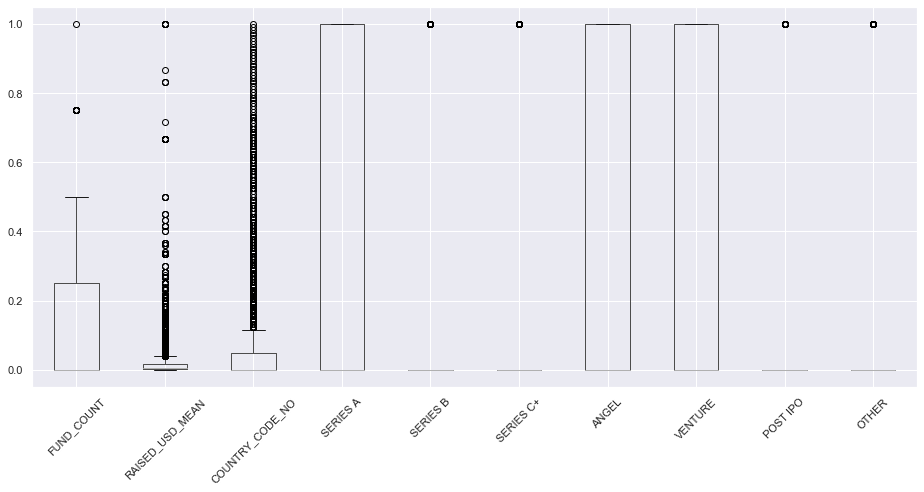

In [10]:
plt.figure(figsize=(13,7))
STARTUP_DF_PREPARED_1_MINMAX_JOINED.boxplot()
plt.xticks(rotation=45)
plt.tight_layout()

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, random_state=101)
pca.fit(STARTUP_DF_PREPARED_1_MINMAX_JOINED)
STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA = pca.transform(STARTUP_DF_PREPARED_1_MINMAX_JOINED)

STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA = pd.DataFrame(STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA,columns=['PC1','PC2'])

STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA

,PC1,PC2
0,0.131778,0.787758
1,0.131778,0.787758
2,0.131900,0.787684
3,0.132059,0.787610
4,0.671411,-0.476384
...,...,...
25075,0.131805,0.787742
25076,0.005738,0.233073
25077,-0.728414,-0.301517
25078,0.132850,0.787235


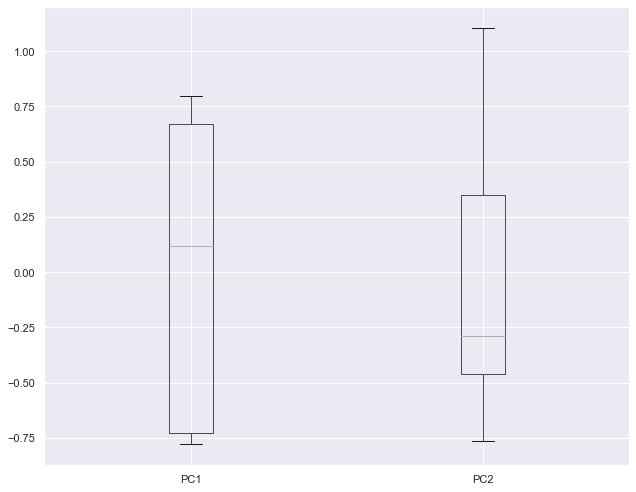

In [12]:
plt.figure(figsize=(9,7))
STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA.boxplot()
plt.tight_layout()

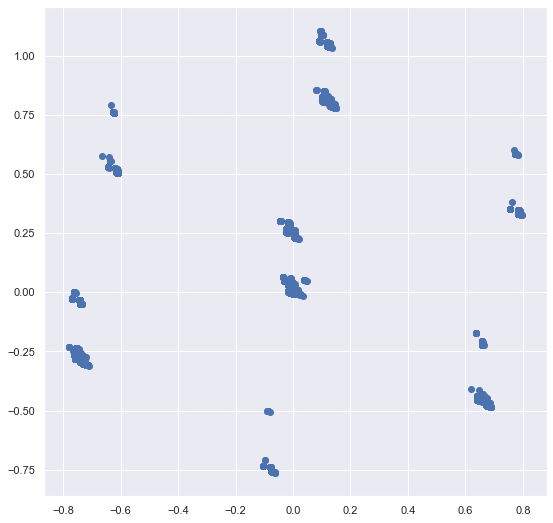

In [13]:
plt.figure (figsize = (9,9))
plt.scatter(STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA['PC1'], STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA['PC2'])
plt.show()

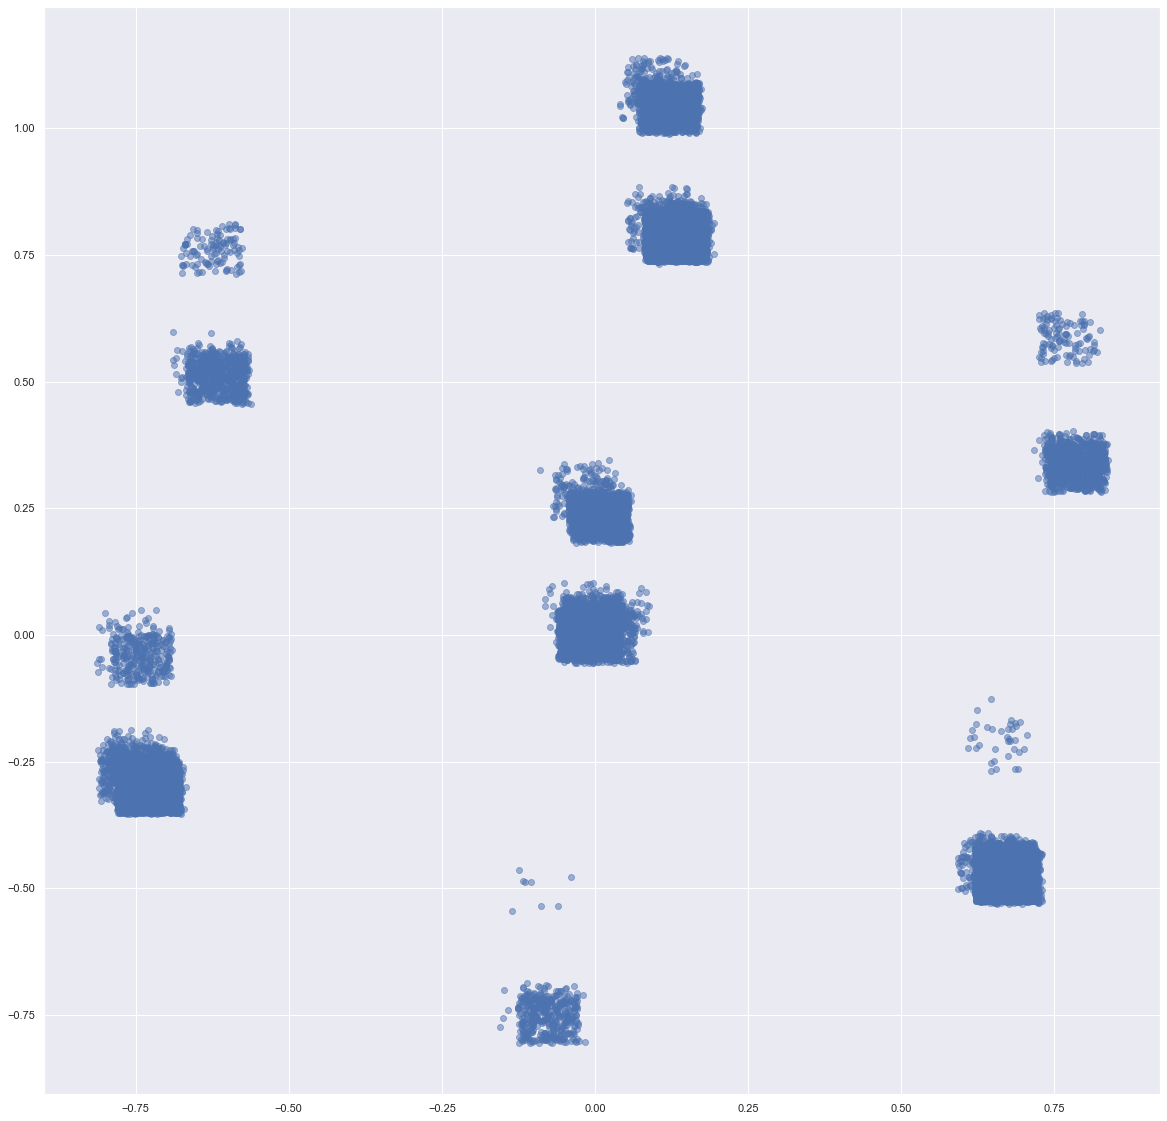

In [14]:
y = STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA['PC1']
x = STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA['PC2']
jittered_y = y + 0.1 * np.random.rand(len(y)) -0.05
jittered_x = x + 0.1 * np.random.rand(len(x)) -0.05

plt.figure (figsize = (20,20))
scatter = plt.scatter(jittered_y, jittered_x, alpha=0.5)
plt.show()

# Clustering model and N-cluster selection
 - Used modeling : K-Means
 - Number of Cluster : 6 Cluster

## N-cluster : 6 standard deviation mean : 0.059
## Improvement of standard deviation mean of N-cluster 5 to 6 is 0.0338

Text(0, 0.5, 'Inertia')

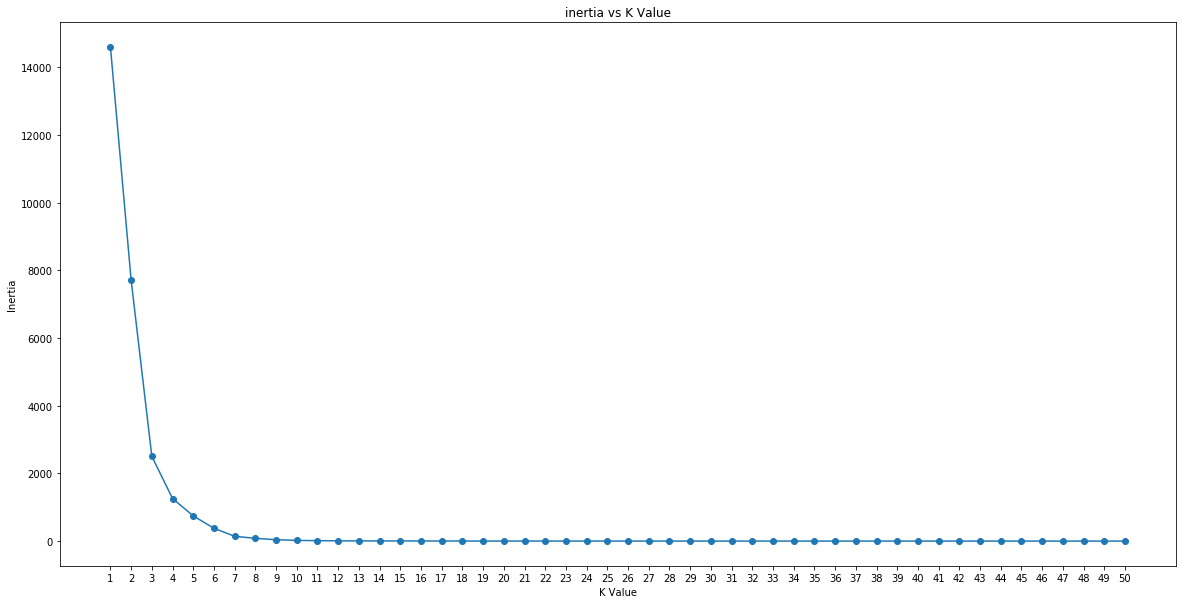

In [8]:
from sklearn.cluster import KMeans

DF_USED = STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA
COLUMN_USED = STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA.columns
PENGACAK = 101
DARI = 1
HINGGA = 51

inertia_list = []

for i in range(DARI,HINGGA):
    kmeans = KMeans(n_clusters = i , random_state = PENGACAK)
    kmeans.fit(DF_USED[COLUMN_USED])
    inertia_list.append(kmeans.inertia_)
    
plt.figure(figsize=(20,10))
plt.plot(range(DARI,HINGGA),inertia_list, marker = 'o')
plt.title('inertia vs K Value')
plt.xticks(range(DARI,HINGGA))
plt.xlabel('K Value')
plt.ylabel('Inertia')

In [9]:
KLUSTERN = 6
DFMENTAH = STARTUP_DF
DF_USED = STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA
PENGACAK = 101

kmeans6 = KMeans (n_clusters = KLUSTERN , random_state = PENGACAK)
kmeans6.fit(DF_USED)
df_kmeans6 = pd.DataFrame (DFMENTAH, columns = DFMENTAH.columns)
df_kmeans6['Cluster'] = kmeans6.labels_

print('Cluster Value Counts')
print(df_kmeans6['Cluster'].value_counts())
print('Cluster Percentage')
print(df_kmeans6['Cluster'].value_counts(1)*100)

Cluster Value Counts
2    7404
0    7105
3    5374
4    3550
5     893
1     754
Name: Cluster, dtype: int64
Cluster Percentage
2    29.521531
0    28.329346
3    21.427432
4    14.154705
5     3.560606
1     3.006380
Name: Cluster, dtype: float64


In [10]:
df_kmeans6.to_csv('df_kmeans6.csv')

In [11]:
df_kmeans6.to_pickle('df_kmeans6.pkl')

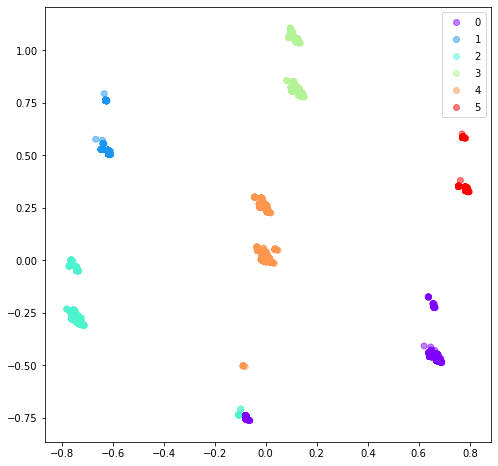

In [19]:
plt.figure (figsize = (8,8))
scatter = plt.scatter(STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA['PC1'], STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA['PC2'],  c = df_kmeans6['Cluster'], cmap='rainbow', alpha=0.5)
plt.legend(*scatter.legend_elements())
plt.show()

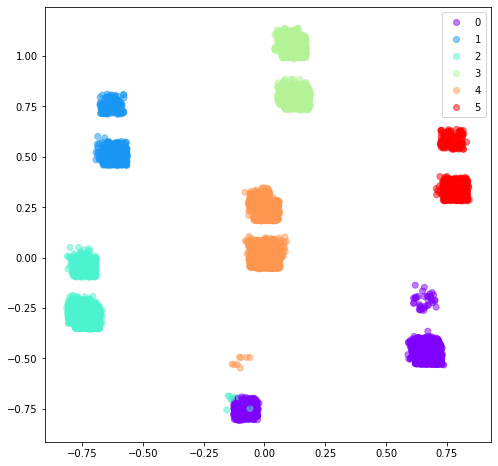

In [20]:
y = STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA['PC1']
x = STARTUP_DF_PREPARED_1_MINMAX_JOINED_PCA['PC2']
jittered_y = y + 0.1 * np.random.rand(len(y)) -0.05
jittered_x = x + 0.1 * np.random.rand(len(x)) -0.05

plt.figure (figsize = (8,8))
scatter = plt.scatter(jittered_y, jittered_x,  c = df_kmeans6['Cluster'], cmap='rainbow', alpha=0.5)
plt.legend(*scatter.legend_elements())
plt.show()

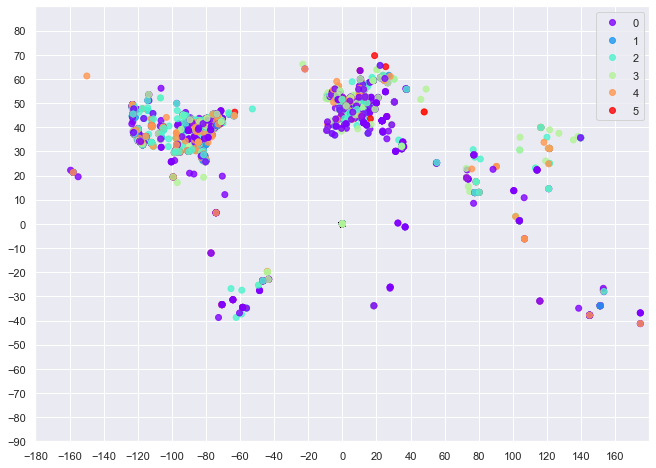

In [34]:
plt.figure(figsize=(11,8))
scatter = plt.scatter(y='LATITUDE',x='LONGITUDE',data=df_kmeans6, c = 'Cluster', cmap='rainbow', alpha=0.8)
plt.ylim(-90,90)
plt.yticks(np.arange(-90,90,10))
plt.xlim(-180,180)
plt.xticks(np.arange(-180,180,20))
plt.legend(*scatter.legend_elements())
plt.show()

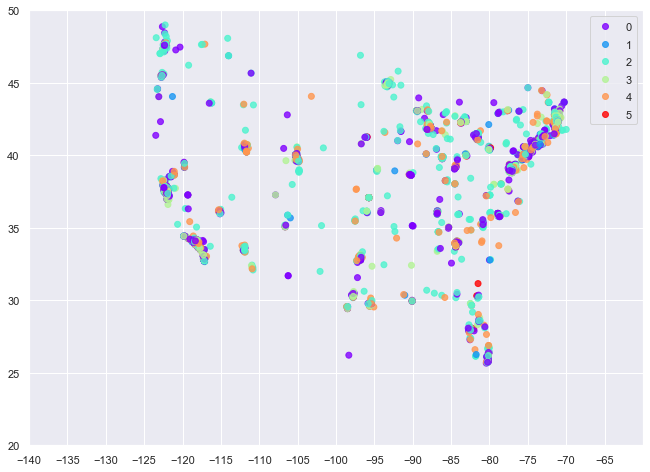

In [35]:
plt.figure(figsize=(11,8))
scatter = plt.scatter(y='LATITUDE',x='LONGITUDE',data=df_kmeans6[df_kmeans6['COUNTRY_CODE']=='USA'], c = 'Cluster', cmap='rainbow', alpha=0.8)
plt.ylim(20,50)
plt.yticks(np.arange(20,55,5))
plt.xlim(-140,-60)
plt.xticks(np.arange(-140,-60,5))
plt.legend(*scatter.legend_elements())
plt.show()

In [31]:
KOLOM = 'FUND_COUNT'

df_kmeans = df_kmeans6

FUND_COUNT_DESC = pd.DataFrame(index = ['MIN','MEAN','MAX'])

for i in np.sort(df_kmeans['Cluster'].unique()):
    clustertemp = []
    clustertemp.append(df_kmeans[df_kmeans['Cluster']==i][KOLOM].min())
    clustertemp.append(df_kmeans[df_kmeans['Cluster']==i][KOLOM].mean())
    clustertemp.append(df_kmeans[df_kmeans['Cluster']==i][KOLOM].max())
    nametemp = 'CLUSTER_' + str(i)
    FUND_COUNT_DESC[nametemp] = clustertemp

FUND_COUNT_DESC

,CLUSTER_0,CLUSTER_1,CLUSTER_2,CLUSTER_3,CLUSTER_4,CLUSTER_5
MIN,1.000000,2.000000,1.00000,1.000000,1.000000,2.000000
MEAN,1.270373,2.403183,1.33617,1.408076,1.216338,2.366181
MAX,4.000000,5.000000,4.00000,4.000000,3.000000,4.000000


In [32]:
KOLOM = 'RAISED_USD_SUM'

df_kmeans = df_kmeans6

RAISED_USD_SUM_DESC = pd.DataFrame(index = ['MIN','MEAN','MAX'])

for i in np.sort(df_kmeans['Cluster'].unique()):
    clustertemp = []
    clustertemp.append(df_kmeans[df_kmeans['Cluster']==i][KOLOM].min())
    clustertemp.append(df_kmeans[df_kmeans['Cluster']==i][KOLOM].mean())
    clustertemp.append(df_kmeans[df_kmeans['Cluster']==i][KOLOM].max())
    nametemp = 'CLUSTER_' + str(i)
    RAISED_USD_SUM_DESC[nametemp] = clustertemp

RAISED_USD_SUM_DESC.T

,MIN,MEAN,MAX
CLUSTER_0,1000.0,6.145353e+05,21089000.0
CLUSTER_1,262500.0,1.014089e+07,50000000.0
CLUSTER_2,1000.0,7.721104e+06,300000000.0
CLUSTER_3,7000.0,7.603939e+06,200000000.0
CLUSTER_4,1003.0,9.270851e+06,300000000.0
CLUSTER_5,112500.0,5.028041e+06,25675000.0


In [33]:
FUND_COUNT_DESC.to_pickle('FUND_COUNT_DESC.pkl')

In [35]:
RAISED_USD_SUM_DESC.to_pickle('RAISED_USD_SUM_DESC.pkl')

In [50]:
TYPE_LIST = ['SERIES A', 'SERIES B',
       'SERIES C+', 'ANGEL', 'VENTURE', 'POST IPO', 'OTHER']

df_kmeans = df_kmeans6

CLUSTER_0 = []

for i in TYPE_LIST:
    try:
        CLUSTER_0.append(df_kmeans[df_kmeans['Cluster']==0][i].value_counts().loc[1])
    except KeyError :
        CLUSTER_0.append(0)
        
CLUSTER_1 = []

for i in TYPE_LIST:
    try:
        CLUSTER_1.append(df_kmeans[df_kmeans['Cluster']==1][i].value_counts().loc[1])
    except KeyError :
        CLUSTER_1.append(0)

CLUSTER_2 = []

for i in TYPE_LIST:
    try:
        CLUSTER_2.append(df_kmeans[df_kmeans['Cluster']==2][i].value_counts().loc[1])
    except KeyError :
        CLUSTER_2.append(0)
        
CLUSTER_3 = []

for i in TYPE_LIST:
    try:
        CLUSTER_3.append(df_kmeans[df_kmeans['Cluster']==3][i].value_counts().loc[1])
    except KeyError :
        CLUSTER_3.append(0)
        
CLUSTER_4 = []

for i in TYPE_LIST:
    try:
        CLUSTER_4.append(df_kmeans[df_kmeans['Cluster']==4][i].value_counts().loc[1])
    except KeyError :
        CLUSTER_4.append(0)
        
CLUSTER_5 = []

for i in TYPE_LIST:
    try:
        CLUSTER_5.append(df_kmeans[df_kmeans['Cluster']==5][i].value_counts().loc[1])
    except KeyError :
        CLUSTER_5.append(0)
        
TOTAL = []
for i in TYPE_LIST:
    TOTAL.append(df_kmeans[i].value_counts().loc[1])
        
FUND_TYPE_DESC = pd.DataFrame(index = TYPE_LIST)
FUND_TYPE_DESC['CLUSTER_0'] = CLUSTER_0
FUND_TYPE_DESC['CLUSTER_1'] = CLUSTER_1
FUND_TYPE_DESC['CLUSTER_2'] = CLUSTER_2
FUND_TYPE_DESC['CLUSTER_3'] = CLUSTER_3
FUND_TYPE_DESC['CLUSTER_4'] = CLUSTER_4
FUND_TYPE_DESC['CLUSTER_5'] = CLUSTER_5
FUND_TYPE_DESC['TOTAL'] = TOTAL

FUND_TYPE_DESC

,CLUSTER_0,CLUSTER_1,CLUSTER_2,CLUSTER_3,CLUSTER_4,CLUSTER_5,TOTAL
SERIES A,0,754,0,5374,57,893,7078
SERIES B,36,112,332,1145,1083,111,2819
SERIES C+,13,13,217,188,814,1,1246
ANGEL,7105,0,20,0,65,893,8083
VENTURE,366,754,7404,0,65,0,8589
POST IPO,2,1,11,3,26,0,43
OTHER,189,45,443,218,1391,27,2313


In [39]:
FUND_COUNT_DESC.T.sort_values(by = 'MEAN')

,MIN,MEAN,MAX
CLUSTER_4,1.0,1.216338,3.0
CLUSTER_0,1.0,1.270373,4.0
CLUSTER_2,1.0,1.336170,4.0
CLUSTER_3,1.0,1.408076,4.0
CLUSTER_5,2.0,2.366181,4.0
CLUSTER_1,2.0,2.403183,5.0


In [40]:
RAISED_USD_SUM_DESC.T.sort_values(by = 'MEAN')

,MIN,MEAN,MAX
CLUSTER_0,1000.0,6.145353e+05,21089000.0
CLUSTER_5,112500.0,5.028041e+06,25675000.0
CLUSTER_3,7000.0,7.603939e+06,200000000.0
CLUSTER_2,1000.0,7.721104e+06,300000000.0
CLUSTER_4,1003.0,9.270851e+06,300000000.0
CLUSTER_1,262500.0,1.014089e+07,50000000.0


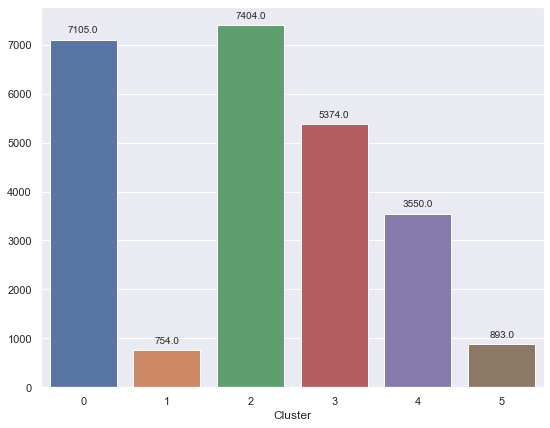

In [76]:
plt.figure(figsize=(9,7))
box = sns.barplot(x=df_kmeans6['Cluster'].value_counts().index, y=df_kmeans6['Cluster'].value_counts().values)
for p in box.patches:
    box.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Cluster')
plt.show()

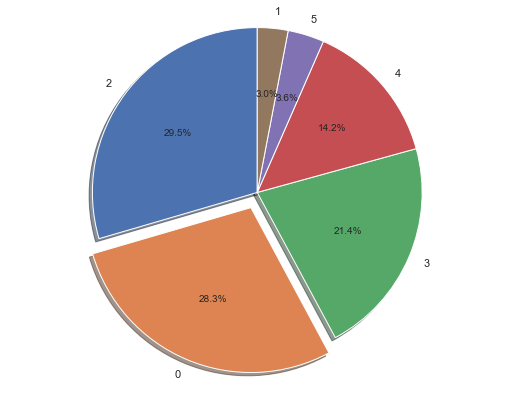

In [84]:
labels = df_kmeans6['Cluster'].value_counts().index
sizes = df_kmeans6['Cluster'].value_counts().values
explode = (0, 0.1, 0, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(9,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

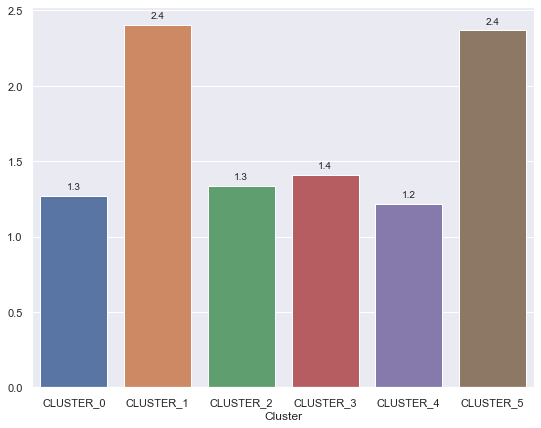

In [77]:
plt.figure(figsize=(9,7))
box = sns.barplot(x=FUND_COUNT_DESC.T['MEAN'].index, y=FUND_COUNT_DESC.T['MEAN'].values)
for p in box.patches:
    box.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Cluster')
plt.show()

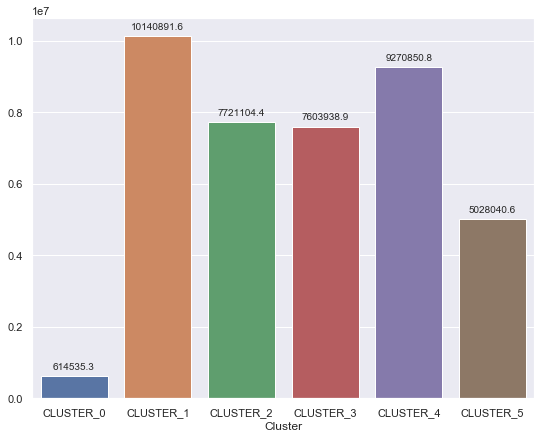

In [78]:
plt.figure(figsize=(9,7))
box = sns.barplot(x=RAISED_USD_SUM_DESC.T['MEAN'].index, y=RAISED_USD_SUM_DESC.T['MEAN'].values)
for p in box.patches:
    box.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Cluster')
plt.show()

# Cluster description
 - by the fund type
 - by the fund count
 - by the fund sum

# Cluster 0
 - Took several funding mostly on Angel and some venture funding
 - Second lowest fund count
 - The lowest in term of average and maximum fund
## Named : Angel Startup

# Cluster 1
 - Mostly took series A and Venture funding
 - A minimum of 2 times funding and the highest average fund count
 - The highest in term of minimum funding and average funding
 ## Named : Big Startup

# Cluster 2
 - Mostly took funding in form of Venture funding
 - Below average fund count
 - Above average in term of average total fund and has the highest maximum total fund
 ## Named : Venture Startup

# Cluster 3
 - Majority took Series A and Series B
 - Above average fund count
 - Below average in average total fund
## Named : Early to Mid Startup

# Cluster 4
 - Took funding mostly on Series B, Series C, or other funding
 - Has the lowest average of fund count
 - Has the second highest average total fund
## Named : Late Fund Startup

# Cluster 5
 - Took funding mostly on Series A or Angel fund
 - 2nd highest fund count 
 - 2nd lowest average total fund
 ## Named : Small Startup

In [7]:
df_kmeans6 = pd.read_pickle('df_kmeans6.pkl')